In [1]:
import torch
from modulation_loss import GaborSTRFConv
import matplotlib.pyplot as plt
import numpy as np
import math

/home/tvuong/anaconda2/envs/deep_3/lib/python3.6/site-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


In [8]:
x = GaborSTRFConv(30,30,10,real_only=False,norm_strf=False)
x.rates_[0] = 8/50. * math.pi
x.scales_[0] = -.05/.5 * math.pi

x.rates_[1] = 4/50. * math.pi
x.scales_[1] = .1/.5 * math.pi
strfs = x.strfs().detach().numpy()



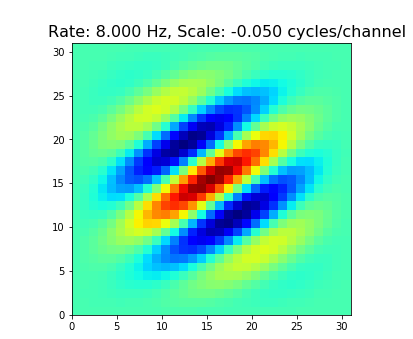

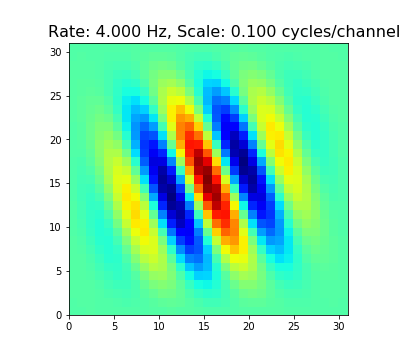

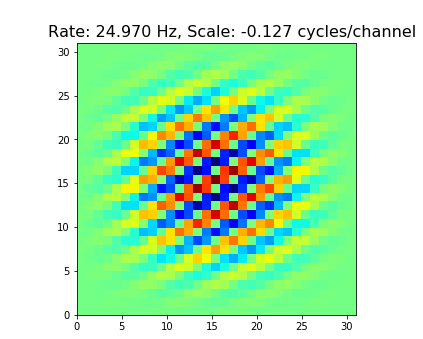

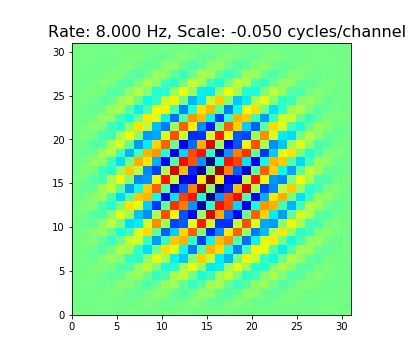

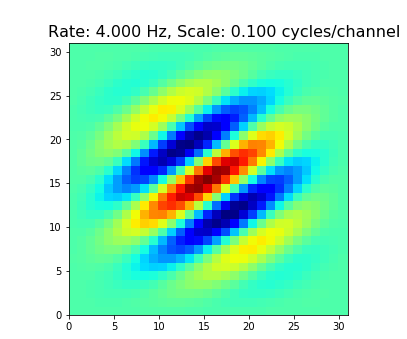

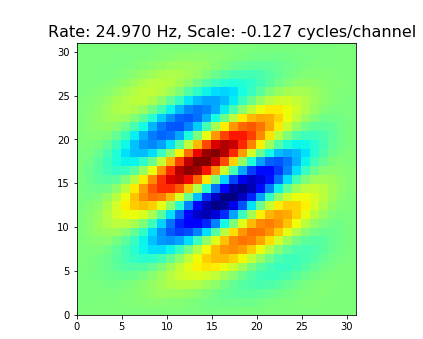

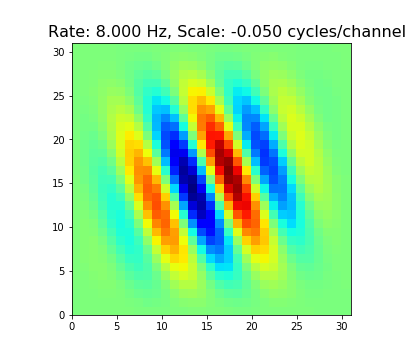

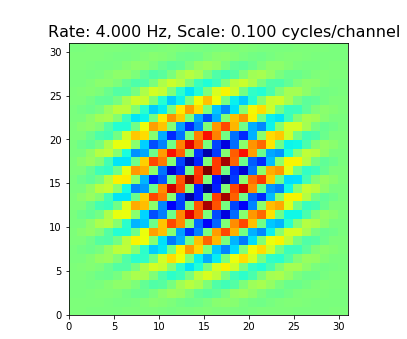

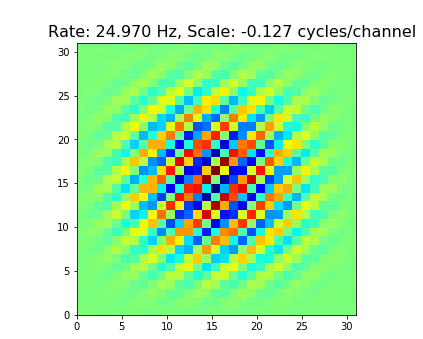

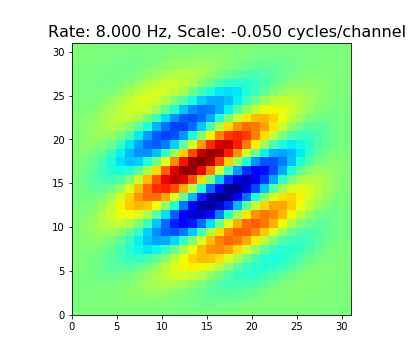

In [9]:
scales = x.scales_.detach().numpy()
rates = x.rates_.detach().numpy()
for i in range(0,10):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    scale = scales[i%5]
    rate = rates[i%5]
    
    ax.clear()
    dbspec = strfs[i]#10*np.log10(np.clip(strfs[i]**2, 1e-8, None))
    ax.pcolormesh(
        dbspec,
        cmap='jet',
        #vmin=-5,
        #vmax=5,
        shading='auto'
    )
    fig.canvas.draw()
    fig.suptitle(
        f'''
        Rate: {rate/math.pi * 50:.3f} Hz, Scale: {scale/math.pi * .5:.3f} cycles/channel''',
        fontsize=16)
    
    plt.pause(.5)
    plt.close(fig)
    
    